# Notebook to run concatenation of all celltypes after annotation

**Created by** : Srivalli Kolla

**Created on** : 4 October, 2024

**Modified on** : 4 October, 2024

**Institute of Systems Immunology, University of Würzburg**

Env : scanpy

# Import Packages

In [22]:
import anndata
import warnings
import time
import datetime
import numpy as np
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 180, color_map = 'magma_r', dpi_save = 300, vector_friendly = True, format = 'svg')

timestamp = datetime.datetime.now().strftime("%d_%m_%y")

-----
anndata     0.10.8
scanpy      1.10.2
-----
PIL                 10.3.0
asttokens           NA
attr                23.2.0
cffi                1.16.0
colorama            0.4.6
comm                0.2.2
cycler              0.12.1
cython_runtime      NA
dateutil            2.9.0.post0
debugpy             1.8.2
decorator           5.1.1
defusedxml          0.7.1
distutils           3.12.4
django              5.0.6
executing           2.0.1
h5py                3.11.0
igraph              0.11.5
ipykernel           6.29.5
ipython_genutils    0.2.0
ipywidgets          8.1.3
jedi                0.19.1
joblib              1.4.2
kiwisolver          1.4.5
legacy_api_wrap     NA
leidenalg           0.10.2
llvmlite            0.43.0
louvain             0.8.2
matplotlib          3.8.4
mpl_toolkits        NA
natsort             8.4.0
numba               0.60.0
numexpr             2.10.1
numpy               1.26.4
packaging           24.1
pandas              2.2.2
parso               0.8.4
pkg_res

# Import Data

In [16]:
files = [
'../data/dmd_annotated_vascular_wt_04_10_24.h5ad',
'../data/dmd_annotated_vascular_mdx,mdxscid_04_10_24.h5ad',
'../data/dmd_annotated_myeloid_wt_04_10_24.h5ad',
'../data/dmd_annotated_myeloid_mdx_mdxscid_04_10_24.h5ad',
'../data/dmd_annotated_lymphoid_wt_04_10_24.h5ad',
'../data/dmd_annotated_lymphoid_mdx,mdxscid_04_10_24.h5ad',
'../data/dmd_annotated_fibroblasts_wt_04_10_24.h5ad',
'../data/dmd_annotated_fibroblasts_mdx,mdxscid_04_10_24.h5ad',
'../data/dmd_annotated_cmc_wt_04_10_24.h5ad',
'../data/dmd_annotated_cmc_mdx,mdxscid_04_10_24.h5ad']


In [17]:
combined = None

for i, file in enumerate(files):
    adata = sc.read_h5ad(file) 
    if combined is None:
        combined = adata  
    else:
        combined = combined.concatenate(adata, join='inner', batch_key='batch')

combined

/tmp/ipykernel_364368/414064358.py:8: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  combined = combined.concatenate(adata, join='inner', batch_key='batch')
/tmp/ipykernel_364368/414064358.py:8: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  combined = combined.concatenate(adata, join='inner', batch_key='batch')
/tmp/ipykernel_364368/414064358.py:8: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  combined = combined.concatenate(adata, join='inner', ba

AnnData object with n_obs × n_vars = 511545 × 7328
    obs: 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'batch_key', 'leiden_scVI', 'cell_type', 'cell_state_HCAv1', 'cell_state_scNym', 'cell_state_scNym_confidence', 'cell_state', 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'n_counts', '_scvi_batch', '_scvi_labels', 'clus20', 'doublet_cls', 'original_or_new', 'batch', 'scANVI_predictions', 'leiden_scArches', 'sample', 'seed_labels', 'genotype', 'doublet_scores', 'predicted_doublets', 'percent_chrY', 'XIST-counts', 'XIST-percentage', 'gender_check_cov', 'S_score', 'G2M_score', 'phase', 'C_scANVI'
    var: 'mt', 'ribo', 'n_cells_by_count

In [18]:
combined.obs['genotype'].value_counts()

genotype
WT         308030
Mdx        108745
MdxSCID     94770
Name: count, dtype: int64

In [19]:
combined.obs['cell_type'].value_counts()

cell_type
vCM4                48862
PC3_str             43765
LYVE1+IGF1+MP       27584
FB1                 27243
CD16+Mo             26290
ILC                 23388
FB4                 22453
vCM3                22026
CD4+T_naive         21362
vCM2                21234
FB3                 20840
PC1_vent            18903
EC1_cap             18504
FB5                 16261
MoMP                15958
CD8+T_cytox         13668
B                   13548
CD14+Mo             11637
FB6                 10893
vCM1                10157
LYVE1+MP_cycling     9571
CD8+T_em             9310
PC2_atria            7625
MAIT-like            7170
DC                   5806
SMC1_basic           5614
LYVE1+TIMD4+MP       5463
CD4+T_reg            5339
EC6_ven              4641
FB2                  4619
B_plasma             3036
EC5_art              2568
NK_CD16hi            1966
NK_CD56hi            1922
CD4+T_act             641
CD8+T_trans           635
EC3_cap               353
CD8+T_te              268
EC

# Data visualization

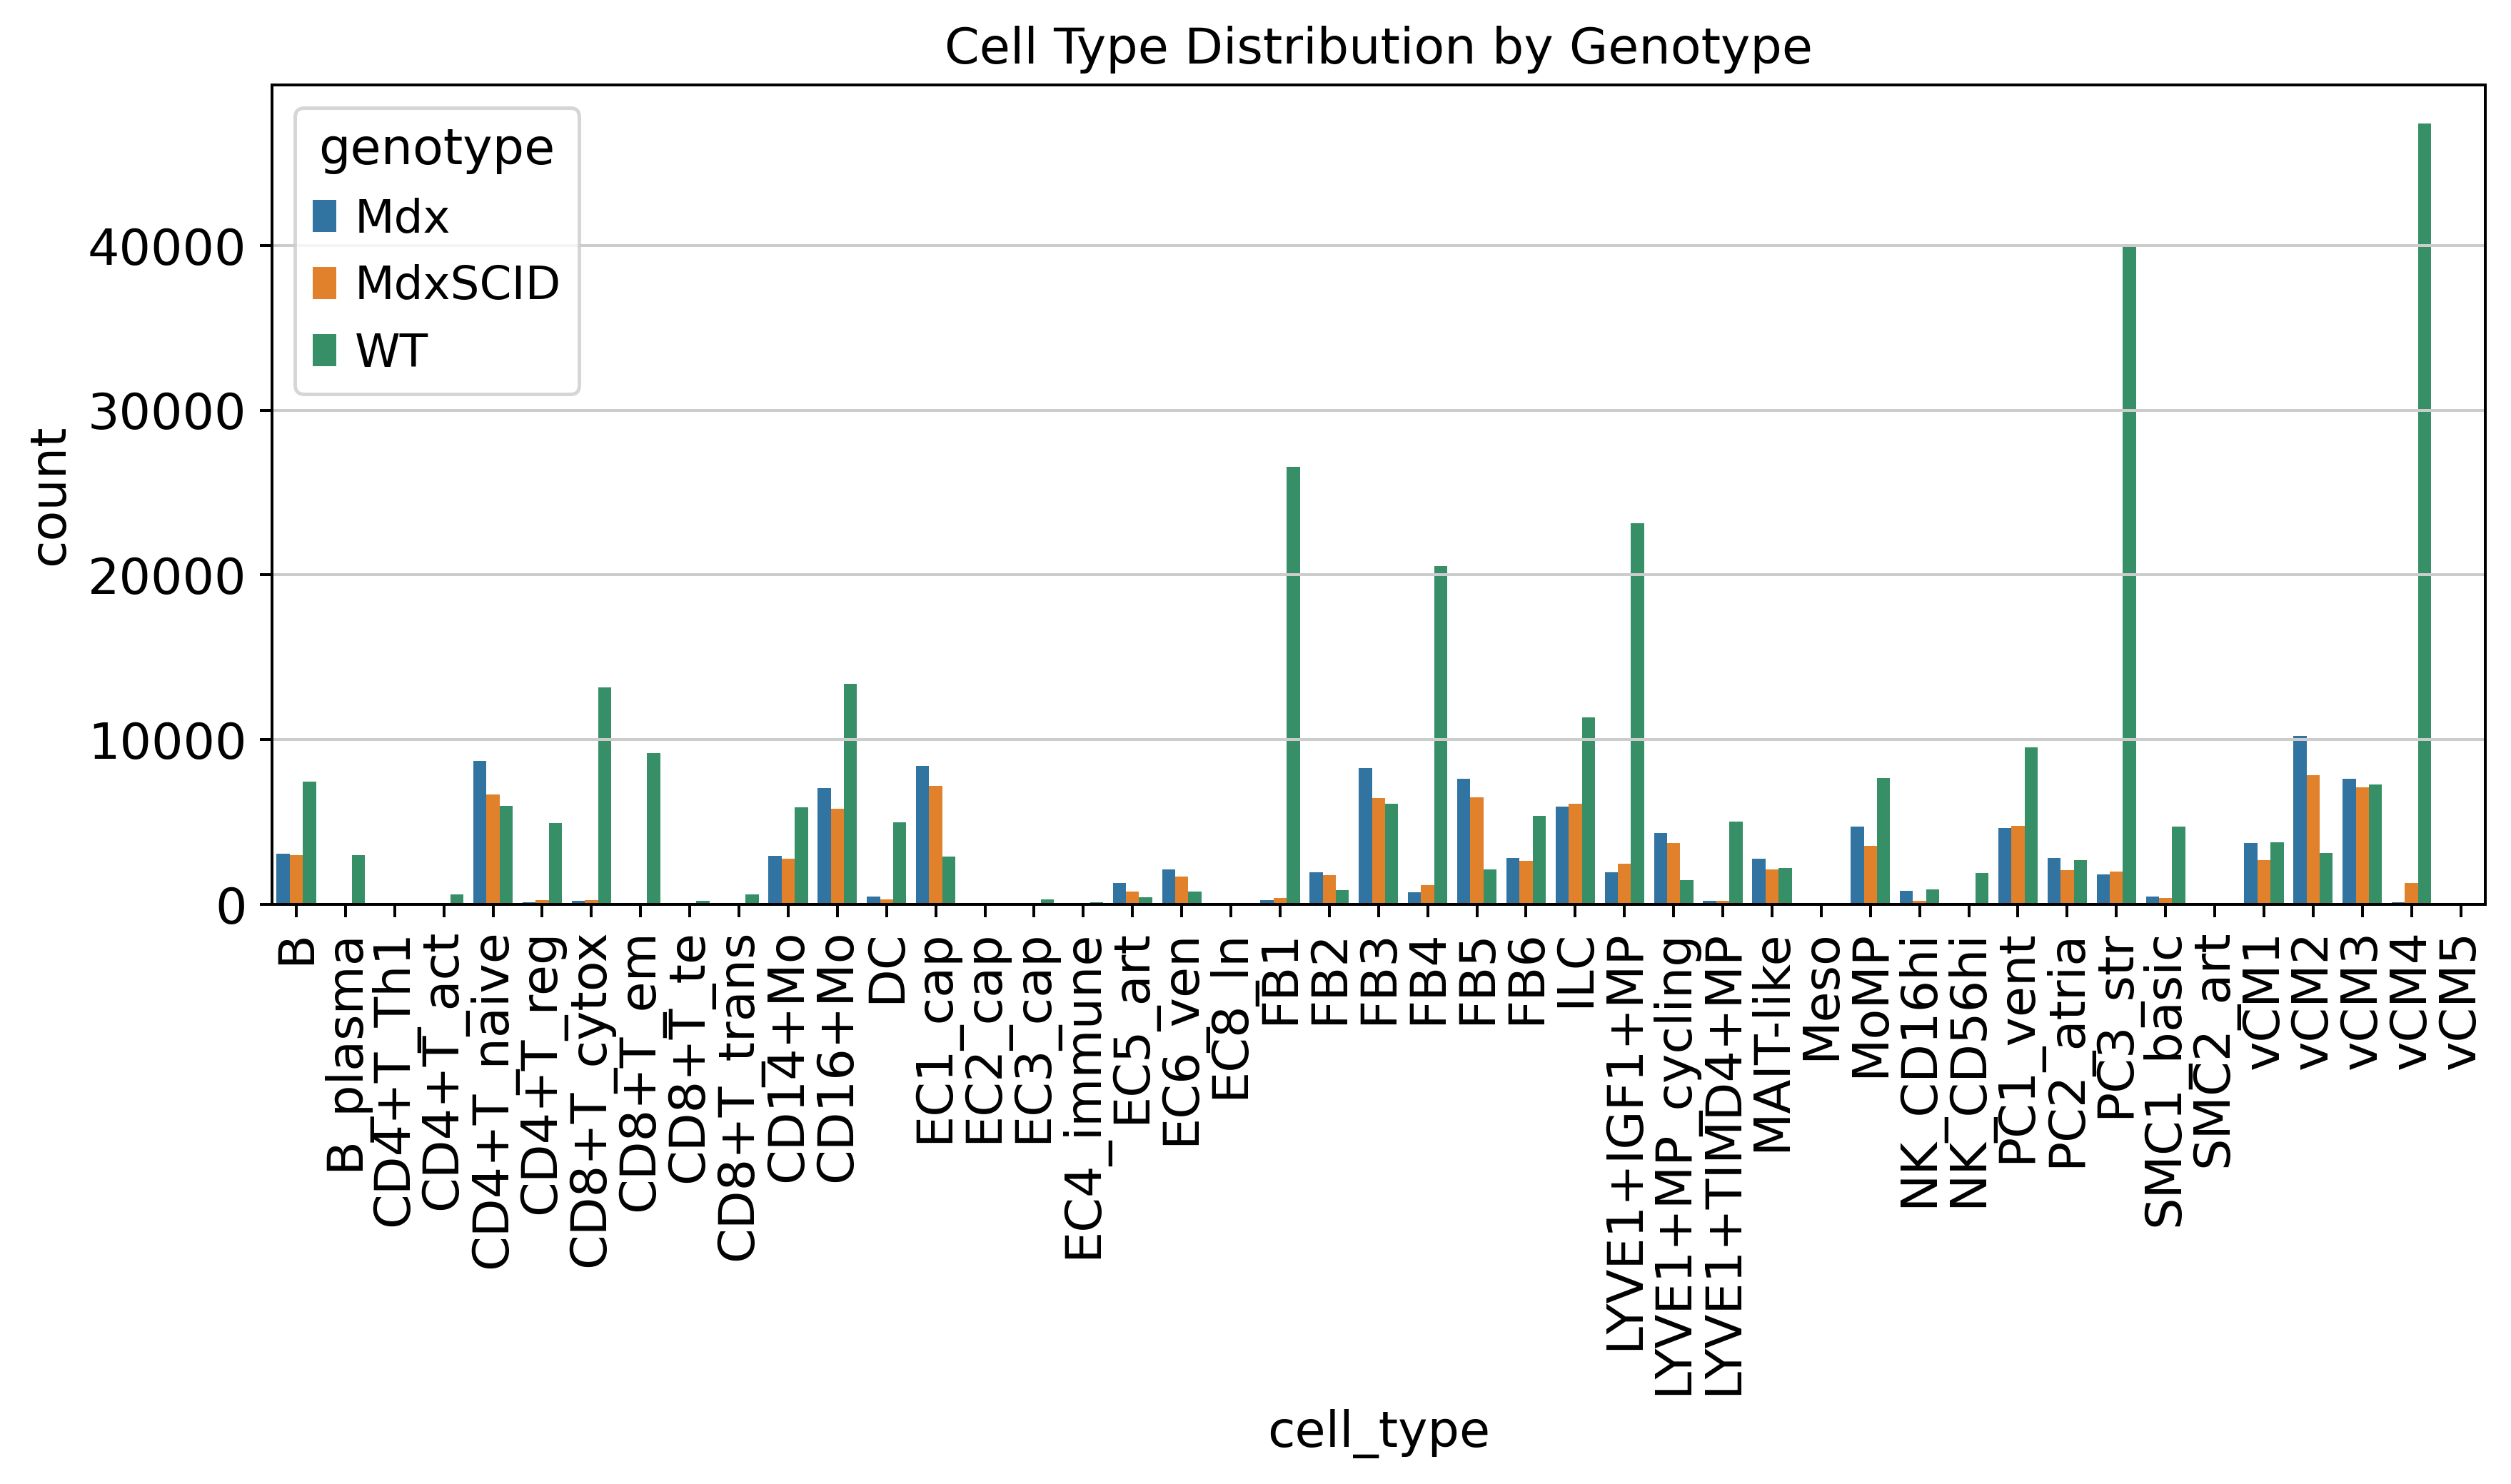

In [23]:
obs_df = combined.obs[['cell_type', 'genotype']]

plt.figure(figsize=(10, 6))
sns.countplot(data=obs_df, x='cell_type', hue='genotype')
plt.xticks(rotation=90) 
plt.title('Cell Type Distribution by Genotype')
plt.tight_layout()
plt.show()

In [24]:
sc.pp.pca(combined)
sc.pp.highly_variable_genes(combined, flavor= 'seurat_v3', layer= 'raw_counts', n_top_genes= 8000, subset= True)
sc.pp.neighbors(combined)
sc.tl.umap(combined, layer = 'normalized')

computing PCA
    with n_comps=50
    finished (0:01:53)
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:01:15)
computing UMAP


/home/skolla/miniforge3/envs/scanpy/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [ ]:
sc.pl.umap(combined, color = ['sample', 'genotype', 'cell_type', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'], layer = 'normalized', frameon = False)